# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

1. Of the cities pulled, the highest temperatures and humidity %'s are right above the equator, while wind speed and humidity results do not show that they are strongly influenced by city location.
2. As a whole the Southern hemisphere city data is more concentrated around high humidities. The Northern hemisphere cities humidity percentages show more distribution between higher and lower humidity percentages.
3. The northern hemisphere tends to be more cloudy!

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from scipy import stats
from scipy.stats import linregress
import moment

# Import API key
from api_keys import wApiKey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputDataFile = "output_data/cities.csv"

# Range of latitudes and longitudes
latRange = (-90, 90)
lngRange = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
latLngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(latRange[0], latRange[1], size=1500)
lngs = np.random.uniform(lngRange[0], lngRange[1], size=1500)
latLngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for latLng in latLngs:
    city = citipy.nearest_city(latLng[0], latLng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
print(cities[0]) #--  test

atuona


In [17]:
# empty lists
cityList = []
lat = []
lng = []
maxTemp = []
humidity = []
cloudiness = [] 
windSpeed = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"



# create for loop that cycles through the weather data for each city and prints out which city is processing
i = 0

print('Beginning Data Retrieval')
print('------------------------')
for city in cities:
    queryUrl = f"{url}appid={wApiKey}&q={city}"    
    i = i + 1
    response = requests.get(queryUrl).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])  
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all']) 
        windSpeed.append(response['wind']['speed']) 
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cityList.append(city)
        print(f"Processing Record {i} of Set 1: {city}")
    except:
        print("City not found. Skipping...")
        pass

print('------------------------')
print('Data Retrieval Complete')
print('------------------------')
# print(response)

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1: atuona
Processing Record 2 of Set 1: narsaq
Processing Record 3 of Set 1: haines junction
Processing Record 4 of Set 1: asau
Processing Record 5 of Set 1: arraial do cabo
Processing Record 6 of Set 1: rong kwang
Processing Record 7 of Set 1: luderitz
Processing Record 8 of Set 1: mersing
Processing Record 9 of Set 1: vardo
Processing Record 10 of Set 1: barrow
City not found. Skipping...
Processing Record 12 of Set 1: rikitea
Processing Record 13 of Set 1: ushuaia
Processing Record 14 of Set 1: fort dodge
Processing Record 15 of Set 1: tuktoyaktuk
Processing Record 16 of Set 1: iqaluit
Processing Record 17 of Set 1: kapaa
Processing Record 18 of Set 1: butaritari
Processing Record 19 of Set 1: jamestown
Processing Record 20 of Set 1: maragogi
Processing Record 21 of Set 1: punta arenas
Processing Record 22 of Set 1: motygino
Processing Record 23 of Set 1: cherskiy
Processing Record 24 of Set 1: prince ruper

City not found. Skipping...
Processing Record 209 of Set 1: maarianhamina
Processing Record 210 of Set 1: hami
Processing Record 211 of Set 1: zaysan
Processing Record 212 of Set 1: santa isabel do rio negro
Processing Record 213 of Set 1: namibe
Processing Record 214 of Set 1: san juan
Processing Record 215 of Set 1: coahuayana
Processing Record 216 of Set 1: mar del plata
Processing Record 217 of Set 1: puerto madero
Processing Record 218 of Set 1: puerto escondido
Processing Record 219 of Set 1: kimbe
Processing Record 220 of Set 1: praia da vitoria
Processing Record 221 of Set 1: rocha
Processing Record 222 of Set 1: gagra
Processing Record 223 of Set 1: itarema
Processing Record 224 of Set 1: porto novo
Processing Record 225 of Set 1: yabassi
Processing Record 226 of Set 1: manaure
Processing Record 227 of Set 1: santa maria
Processing Record 228 of Set 1: olinda
Processing Record 229 of Set 1: constitucion
Processing Record 230 of Set 1: korla
City not found. Skipping...
Processi

Processing Record 413 of Set 1: santa lucia
Processing Record 414 of Set 1: isabela
Processing Record 415 of Set 1: visby
Processing Record 416 of Set 1: lakselv
City not found. Skipping...
Processing Record 418 of Set 1: rudnyy
Processing Record 419 of Set 1: belmonte
Processing Record 420 of Set 1: idaho falls
Processing Record 421 of Set 1: fortuna
Processing Record 422 of Set 1: emba
Processing Record 423 of Set 1: lompoc
Processing Record 424 of Set 1: saint-joseph
Processing Record 425 of Set 1: katsuura
Processing Record 426 of Set 1: yeppoon
Processing Record 427 of Set 1: praya
Processing Record 428 of Set 1: balakhninskiy
Processing Record 429 of Set 1: danville
Processing Record 430 of Set 1: santa pola
Processing Record 431 of Set 1: kavieng
Processing Record 432 of Set 1: ternate
Processing Record 433 of Set 1: cidreira
Processing Record 434 of Set 1: vung tau
Processing Record 435 of Set 1: ust-nera
Processing Record 436 of Set 1: xuddur
City not found. Skipping...
Proces

In [ ]:
# print(city)
# print(test)
# print(response)

## Convert Raw Data to DataFrame

Export the city data into a .csv.

Display the DataFrame

In [6]:
# Create a dictionary out of the city weather data
data = {
    'City': cityList,
    'Lat': lat,
    'Lng': lng,
    'Max Temp':maxTemp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed': windSpeed,
    'Country': country,
    'Date':date

}

# Create a dataframe out of the city weather data
df = pd.DataFrame(data)

# Export data to csv and read csv back in as cityWeather dataframe 
df.to_csv('../output_data/cityWeather.csv', index = False)
cityWeather = pd.read_csv('../output_data/cityWeather.csv')
cityWeather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,298.48,76,44,8.10,PF,1658618853
1,narsaq,60.9167,-46.0500,285.27,83,99,1.75,GL,1658618787
2,haines junction,60.7522,-137.5108,291.12,36,74,5.66,CA,1658618853
3,asau,46.4333,26.4000,297.01,70,55,1.52,RO,1658618556
4,arraial do cabo,-22.9661,-42.0278,295.39,87,6,9.44,BR,1658618586


In [7]:
# show info about new dataframe 
cityWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        540 non-null    object 
 1   Lat         540 non-null    float64
 2   Lng         540 non-null    float64
 3   Max Temp    540 non-null    float64
 4   Humidity    540 non-null    int64  
 5   Cloudiness  540 non-null    int64  
 6   Wind Speed  540 non-null    float64
 7   Country     536 non-null    object 
 8   Date        540 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 38.1+ KB


In [8]:
# quick statistical summary

cityWeather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.00000,540.000000,540.000000,5.400000e+02
mean,20.686987,17.455285,293.624000,73.62963,54.574074,3.461315,1.658619e+09
std,33.702815,89.352004,7.808786,19.83634,38.190472,2.419010,9.017102e+01
min,-54.800000,-179.166700,269.960000,1.00000,0.000000,0.000000,1.658618e+09
25%,-5.024750,-63.720850,288.197500,65.00000,17.000000,1.595000,1.658619e+09
50%,23.045450,23.839700,293.990000,78.00000,57.500000,2.965000,1.658619e+09
75%,50.644925,90.512650,299.450000,88.00000,96.000000,4.637500,1.658619e+09
max,78.218600,179.316700,312.940000,100.00000,100.000000,13.370000,1.658619e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
# find out if there are cities where humidity > 100%, there aren't so skip this step
cityWeather.loc[cityWeather['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

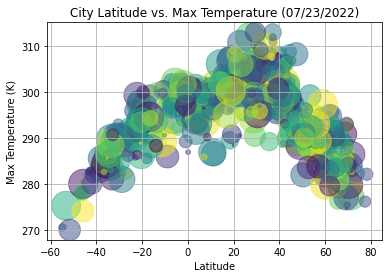

In [130]:
# place latitude data in x and max temp data in y
x = cityWeather['Lat']
y = cityWeather['Max Temp']

# Fixing random state for reproducibility
np.random.seed(19680801)

# use random to set size and color to give scatter plot a little life
N = 540
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radi

# create a scatter plot that shows Latitude vs. Temperature
plt.scatter(x,y,c=colors, s=area, alpha=0.5)
plt.grid()

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.title('City Latitude vs. Max Temperature (07/23/2022)')

# save image
plt.savefig('../output_data/Latitude vs. Temperature Plot.png')
# Display plot
plt.show()



## Latitude vs. Humidity Plot

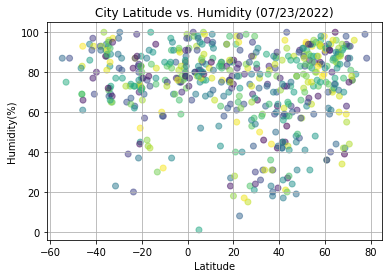

In [131]:
# place latitude data in x and Humidity data in y
x = cityWeather['Lat']
y = cityWeather['Humidity']

# Fixing random state for reproducibility
np.random.seed(19680801)

# use random to set size and color to give scatter plot a little life
N = 540
colors = np.random.rand(N)

# create a scatter plot that shows Latitude vs. Temperature
plt.scatter(x,y,c=colors, alpha=0.5)
plt.grid()

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title('City Latitude vs. Humidity (07/23/2022)')

# save image
plt.savefig('../output_data/Latitude vs. Humidity Plot.png')

# Display plot
plt.show()

## Latitude vs. Cloudiness Plot

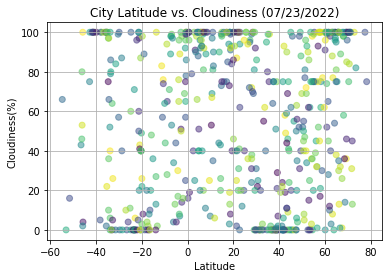

In [132]:
# place latitude data in x and Cloudiness data in y
x = cityWeather['Lat']
y = cityWeather['Cloudiness']

# Fixing random state for reproducibility
np.random.seed(19680801)

# use random to set size and color to give scatter plot a little life
N = 540
colors = np.random.rand(N)

# create a scatter plot that shows Latitude vs. Temperature
plt.scatter(x,y,c=colors, alpha=0.5)
plt.grid()

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title('City Latitude vs. Cloudiness (07/23/2022)')

# save image
plt.savefig('../output_data/Latitude vs. Cloudiness Plot.png')

# Display plot
plt.show()

## Latitude vs. Wind Speed Plot

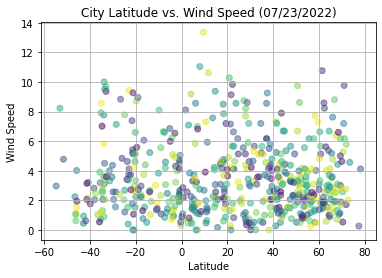

In [133]:
# place latitude data in x and Cloudiness data in y
x = cityWeather['Lat']
y = cityWeather['Wind Speed']

# Fixing random state for reproducibility
np.random.seed(19680801)

# use random to set size and color to give scatter plot a little life
N = 540
colors = np.random.rand(N)

# create a scatter plot that shows Latitude vs. Temperature
plt.scatter(x,y,c=colors, alpha=0.5)
plt.grid()

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('City Latitude vs. Wind Speed (07/23/2022)')

# save image
plt.savefig('../output_data/Latitude vs. Wind Speed Plot.png')

# Display plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.6141597870296064


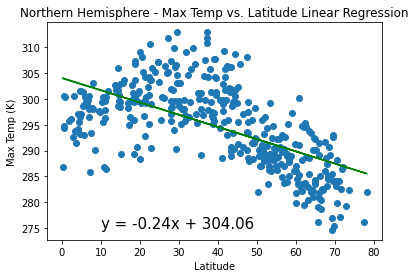

In [134]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

# create subDF with Northern hemisphere info
subDF = cityWeather[['Max Temp','Lat']]
northDF = subDF.loc[subDF['Lat'] > 0]

# set xValues and yValues
xValues = northDF['Lat']
yValues = northDF['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept

# set line_eq variable to add to graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"g-")
plt.annotate(line_eq,(10,275),fontsize=15,color="black")

# add labels
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (K)")

# save image
plt.savefig('../output_data/North Max Temp vs. Latitude Linear Regression.png')

print(f'The r-value is : {rvalue}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.8486527635217416


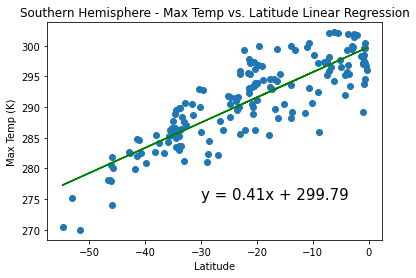

In [135]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

# create subDF with Southern hemisphere info
subDF = cityWeather[['Max Temp','Lat']]
southDF = subDF.loc[subDF['Lat'] < 0]

# set xValues and yValues
xValues = southDF['Lat']
yValues = southDF['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept

# set line_eq variable to add to graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"g-")
plt.annotate(line_eq,(-30,275),fontsize=15,color="black")

# add labels
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (K)")

# save image
plt.savefig('../output_data/South Max Temp vs. Latitude Linear Regression.png')

print(f'The r-value is : {rvalue}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.03207459318755849


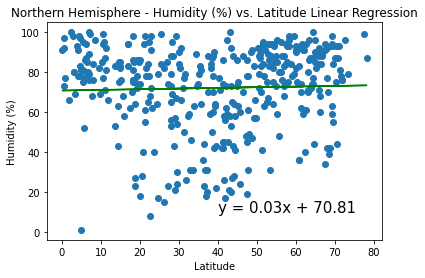

In [136]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# create subDF with Northern hemisphere info
subDF = cityWeather[['Humidity','Lat']]
northDF = subDF.loc[subDF['Lat'] > 0]

# set xValues and yValues
xValues = northDF['Lat']
yValues = northDF['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept

# set line_eq variable to add to graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"g-")
plt.annotate(line_eq,(40,10),fontsize=15,color="black")

# add labels
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# save image
plt.savefig('../output_data/North Humidity (%) vs. Latitude Linear Regression.png')

print(f'The r-value is : {rvalue}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : -0.07611296744404872


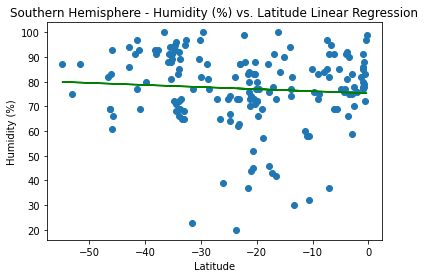

In [137]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# create subDF with Southern hemisphere info
subDF = cityWeather[['Humidity','Lat']]
southDF = subDF.loc[subDF['Lat'] < 0]

# set xValues and yValues
xValues = southDF['Lat']
yValues = southDF['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept

# set line_eq variable to add to graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"g-")
plt.annotate(line_eq,(40,10),fontsize=15,color="black")

# add labels
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# save image
plt.savefig('../output_data/South Humidity (%) vs. Latitude Linear Regression.png')

print(f'The r-value is : {rvalue}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : -0.04562600301620365


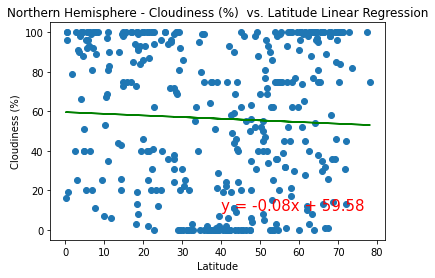

In [138]:
# Northern Hemisphere - Cloudiness (%)  vs. Latitude Linear Regression

# create subDF with Northern hemisphere info
subDF = cityWeather[['Cloudiness','Lat']]
northDF = subDF.loc[subDF['Lat'] > 0]

# set xValues and yValues
xValues = northDF['Lat']
yValues = northDF['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept

# set line_eq variable to add to graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"g-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# add labels
plt.title("Northern Hemisphere - Cloudiness (%)  vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# save image
plt.savefig('../output_data/North Cloudiness (%) vs. Latitude Linear Regression.png')

print(f'The r-value is : {rvalue}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.030972276491752125


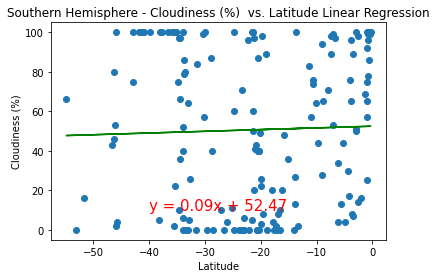

In [139]:
# Southern Hemisphere - Cloudiness (%)  vs. Latitude Linear Regression

# create subDF with Southern hemisphere info
subDF = cityWeather[['Cloudiness','Lat']]
southDF = subDF.loc[subDF['Lat'] < 0]

# set xValues and yValues
xValues = southDF['Lat']
yValues = southDF['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept

# set line_eq variable to add to graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"g-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

# add labels
plt.title("Southern Hemisphere - Cloudiness (%)  vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# save image
plt.savefig('../output_data/South Cloudiness (%) vs. Latitude Linear Regression.png')

print(f'The r-value is : {rvalue}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.02991783563914402


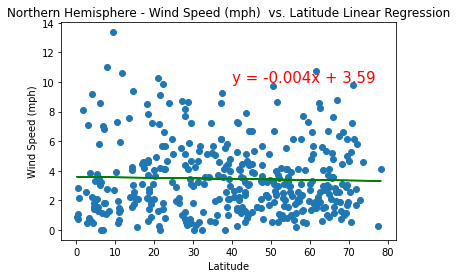

In [140]:
# Northern Hemisphere - Wind Speed (mph)  vs. Latitude Linear Regression

# create subDF with Northern hemisphere info
subDF = cityWeather[['Wind Speed','Lat']]
northDF = subDF.loc[subDF['Lat'] > 0]

# set xValues and yValues
xValues = northDF['Lat']
yValues = northDF['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept

# set line_eq variable to add to graph
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"g-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# add labels
plt.title("Northern Hemisphere - Wind Speed (mph)  vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# save image
plt.savefig('../output_data/North Wind Speed (mph) vs. Latitude Linear Regression.png')

print(f'The r-value is : {rvalue}')
plt.show()

The r-value is: 0.04019723576144484


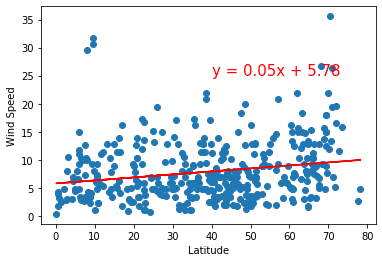

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.04680027853660841


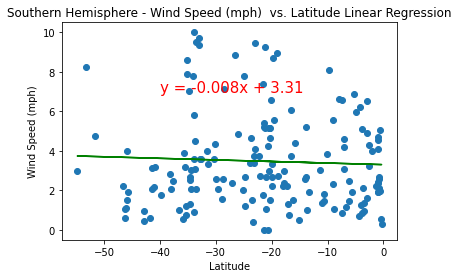

In [141]:
# Southern Hemisphere - Wind Speed (mph)  vs. Latitude Linear Regression

# create subDF with Southern hemisphere info
subDF = cityWeather[['Wind Speed','Lat']]
southDF = subDF.loc[subDF['Lat'] < 0]

# set xValues and yValues
xValues = southDF['Lat']
yValues = southDF['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept

# set line_eq variable to add to graph
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"g-")
plt.annotate(line_eq,(-40,7),fontsize=15,color="red")

# add labels
plt.title("Southern Hemisphere - Wind Speed (mph)  vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# save image
plt.savefig('../output_data/South Wind Speed (mph) vs. Latitude Linear Regression.png')

print(f'The r-value is : {rvalue}')
plt.show()